In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import get_line, set_font_size

FPS = 2
DT = 1/FPS
T = np.arange(61)*DT - 10
T_COLS = [f'IT_{it}' for it in range(61)]

In [2]:
df_pacheco_param = pd.read_csv('data/simple/pacheco_dyn_fit_param.csv')

df_pacheco_data = pd.read_csv('data/simple/pacheco.csv')

mout = (df_pacheco_param['TAU_R'] > 40) | (np.abs(df_pacheco_param['X_S']) > 20) | (np.abs(df_pacheco_param['X_P']) > 20)

In [3]:
df_pacheco_data

,EXPT_ID,STIM,FLY,NEUROPIL,NEUROPIL_IDX,RESPONSE_TYPE_LABEL,IT_0,IT_1,IT_2,IT_3,...,IT_51,IT_52,IT_53,IT_54,IT_55,IT_56,IT_57,IT_58,IT_59,IT_60
0,0,S,1,sSADC,0,13,-0.033654,0.039349,-0.090484,0.401704,...,1.082081,0.920516,0.633192,0.459923,0.777835,0.852022,0.777709,0.278367,0.074631,0.042462
1,0,P,1,sSADC,0,13,0.617594,0.378234,0.414807,0.080734,...,0.246901,0.488439,0.480255,0.425880,0.650568,0.628899,0.368041,0.032336,0.248447,-0.126652
2,1,S,1,AMMC,1,13,0.336833,0.408993,0.474425,0.213802,...,1.001931,0.897849,0.874968,0.410459,0.555852,0.387268,0.438035,0.307526,0.391527,0.531009
3,1,P,1,AMMC,1,13,0.168264,-0.182815,-0.143902,0.101796,...,0.702984,0.584333,0.336659,0.414276,0.284469,0.080918,0.384536,0.325093,0.335583,0.242322
4,2,S,1,sSADC,0,13,0.261517,0.033362,0.034890,0.212583,...,0.288560,0.482021,0.431282,0.281125,0.085184,-0.035244,0.125191,0.065407,-0.110486,-0.020802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38067,19033,P,47,GNG,3,18,-0.039356,-0.014598,-0.034997,-0.035381,...,0.153143,0.171215,0.112855,0.084740,0.064839,0.034636,0.019822,0.042430,0.048326,0.051901
38068,19034,S,47,sSADC,0,15,0.710741,0.594676,0.427717,0.166460,...,2.247301,1.373531,1.862249,1.769727,1.958070,2.003307,1.319867,1.124926,1.354274,1.268899
38069,19034,P,47,sSADC,0,15,0.662882,0.455962,0.019223,-0.011819,...,1.422577,1.974313,1.708528,1.429057,1.396340,1.190694,0.925789,0.586538,0.335784,0.296388
38070,19035,S,47,PLP,7,12,0.123877,-0.103292,-0.265331,-0.061722,...,0.086945,0.273224,0.522694,0.491431,0.948518,1.173859,1.000480,0.539625,0.273782,-0.010819


728 outliers, 18308 valid ROIs


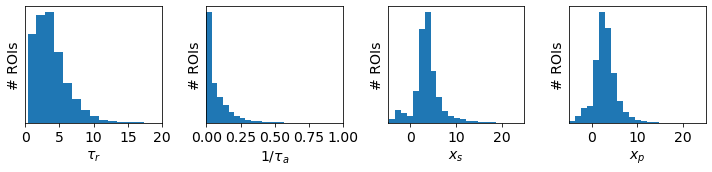

In [4]:
# dynamical fit param distributions
fig, axs = plt.subplots(1, 4, figsize=(10, 2.5), tight_layout=True)
axs[0].hist(df_pacheco_param['TAU_R'][~mout], bins=30)
axs[0].set_xlim(0, 20)
axs[0].set_xlabel(r'$\tau_r$')
axs[1].hist(1/df_pacheco_param['TAU_A'][~mout], bins=30)
axs[1].set_xlim(0, 1)
axs[1].set_xlabel(r'$1/\tau_a$')
axs[2].hist(df_pacheco_param['X_S'][~mout], bins=30)
axs[2].set_xlim(-5, 25)
axs[2].set_xlabel(r'$x_s$')
axs[3].hist(df_pacheco_param['X_P'][~mout], bins=30)
axs[3].set_xlim(-5, 25)
axs[3].set_xlabel(r'$x_p$')

for ax in axs:
    ax.set_yticks([])
    ax.set_ylabel('# ROIs')
set_font_size(axs, 14)

print(f'{mout.sum()} outliers, {(~mout).sum()} valid ROIs')

In [5]:
neuropils = np.unique(df_pacheco_param['NEUROPIL'])

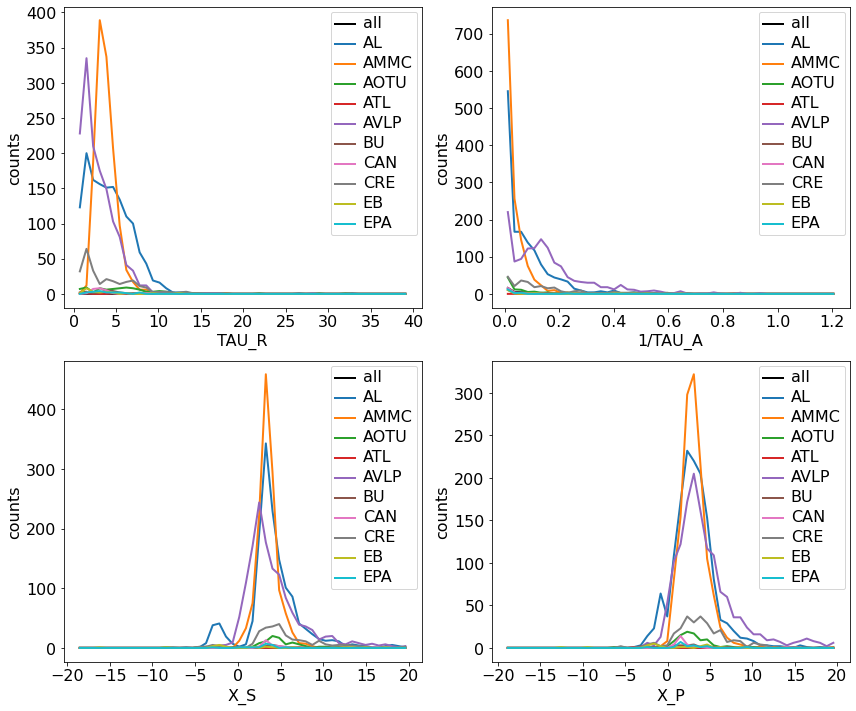

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
for ax, param in zip(axs.flatten(), ['TAU_R', 'TAU_A', 'X_S', 'X_P']):
    values = df_pacheco_param[param]
    if param == 'TAU_A':
        values = 1/values
        
    cts, bins = np.histogram(values[~mout], bins=50, density=True)
    binc = .5*(bins[:-1] + bins[1:])
    ax.plot(binc, cts, c='k', lw=2)
    ax.set_xlabel(param) if param != 'TAU_A' else ax.set_xlabel('1/TAU_A')
    ax.set_ylabel('counts')
    
    for neuropil in neuropils[:10]:
        mneuropil = df_pacheco_param['NEUROPIL'] == neuropil
        
        cts, bins = np.histogram(values[mneuropil & (~mout)], bins=bins)
        ax.plot(binc, cts, lw=2)
    
    ax.legend(['all'] + list(neuropils[:10]))
    
    set_font_size(ax, 16)

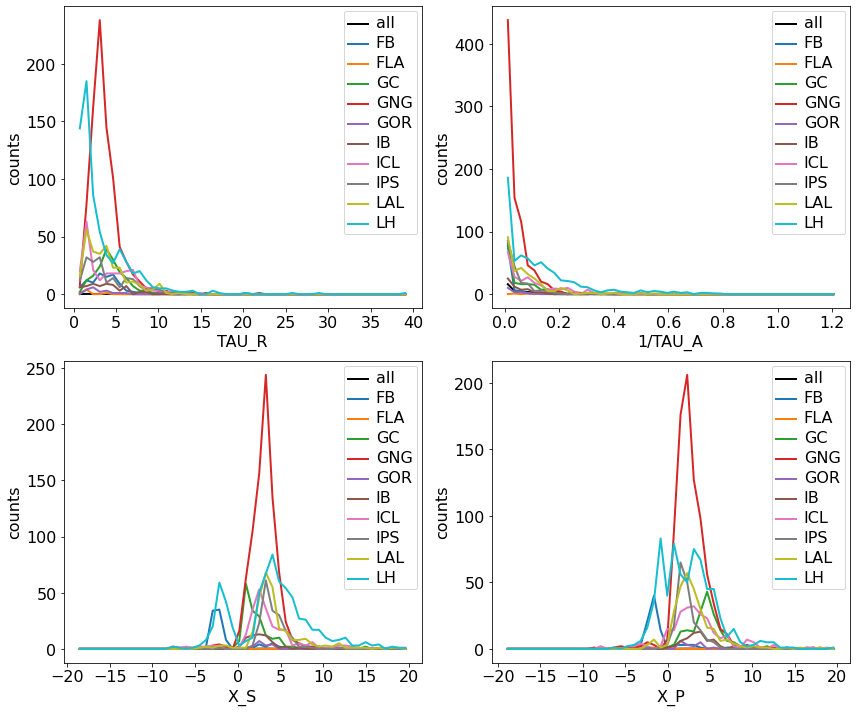

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
for ax, param in zip(axs.flatten(), ['TAU_R', 'TAU_A', 'X_S', 'X_P']):
    values = df_pacheco_param[param]
    if param == 'TAU_A':
        values = 1/values
        
    cts, bins = np.histogram(values[~mout], bins=50, density=True)
    binc = .5*(bins[:-1] + bins[1:])
    ax.plot(binc, cts, c='k', lw=2)
    ax.set_xlabel(param) if param != 'TAU_A' else ax.set_xlabel('1/TAU_A')
    ax.set_ylabel('counts')
    
    for neuropil in neuropils[10:20]:
        mneuropil = df_pacheco_param['NEUROPIL'] == neuropil
        
        cts, bins = np.histogram(values[mneuropil & (~mout)], bins=bins)
        ax.plot(binc, cts, lw=2)
    
    ax.legend(['all'] + list(neuropils[10:20]))
    
    set_font_size(ax, 16)

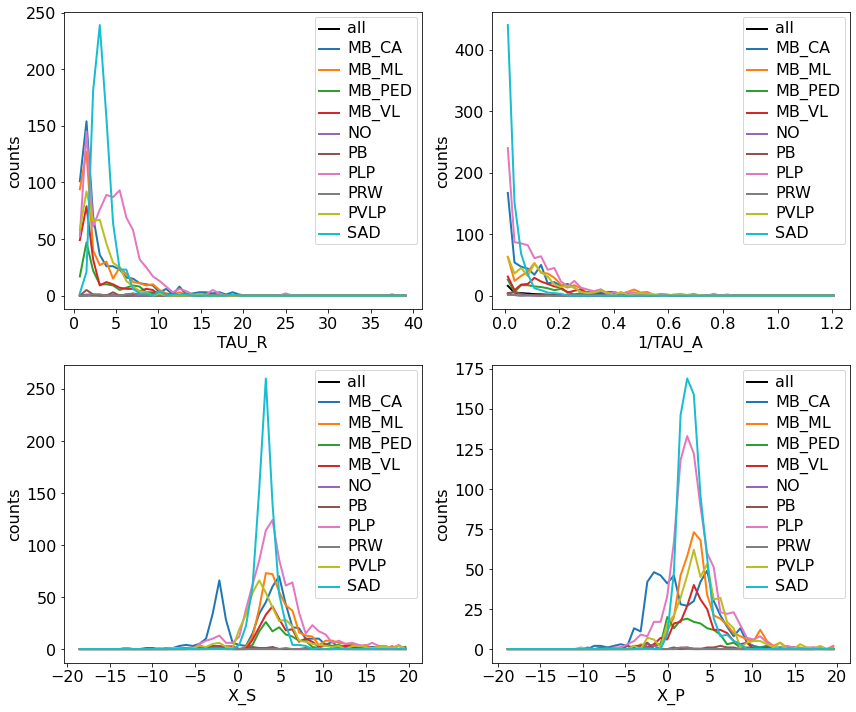

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
for ax, param in zip(axs.flatten(), ['TAU_R', 'TAU_A', 'X_S', 'X_P']):
    values = df_pacheco_param[param]
    if param == 'TAU_A':
        values = 1/values
        
    cts, bins = np.histogram(values[~mout], bins=50, density=True)
    binc = .5*(bins[:-1] + bins[1:])
    ax.plot(binc, cts, c='k', lw=2)
    ax.set_xlabel(param) if param != 'TAU_A' else ax.set_xlabel('1/TAU_A')
    ax.set_ylabel('counts')
    
    for neuropil in neuropils[20:30]:
        mneuropil = df_pacheco_param['NEUROPIL'] == neuropil
        
        cts, bins = np.histogram(values[mneuropil & (~mout)], bins=bins)
        ax.plot(binc, cts, lw=2)
    
    ax.legend(['all'] + list(neuropils[20:30]))
    
    set_font_size(ax, 16)

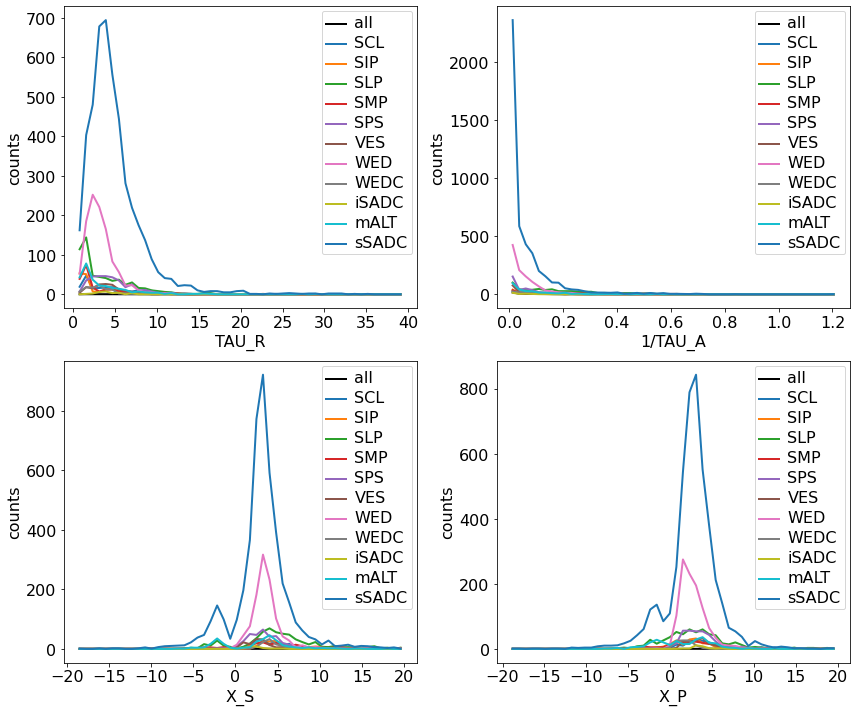

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
for ax, param in zip(axs.flatten(), ['TAU_R', 'TAU_A', 'X_S', 'X_P']):
    values = df_pacheco_param[param]
    if param == 'TAU_A':
        values = 1/values
        
    cts, bins = np.histogram(values[~mout], bins=50, density=True)
    binc = .5*(bins[:-1] + bins[1:])
    ax.plot(binc, cts, c='k', lw=2)
    ax.set_xlabel(param) if param != 'TAU_A' else ax.set_xlabel('1/TAU_A')
    ax.set_ylabel('counts')
    
    for neuropil in neuropils[30:45]:
        mneuropil = df_pacheco_param['NEUROPIL'] == neuropil
        
        cts, bins = np.histogram(values[mneuropil & (~mout)], bins=bins)
        ax.plot(binc, cts, lw=2)
    
    ax.legend(['all'] + list(neuropils[30:45]))
    
    set_font_size(ax, 16)